# Topic 7 DQ 2

What are some potential limitations or assumptions of ANOVA and linear models, and how might these affect the validity of the results? How can these limitations be addressed or mitigated? How can Python be used to develop a useful tool in this context?

Prepare your answer as follows:

   - Provide a professionally written answer, anchored in scholarly work.
   - Create a diagram, table, or other visual prop to help explain your answer and include 1–2 sentences describing the visuals.
   - Include a Jupyter notebook with the relevant Python code you created.
   - Record a short 2- to 3-minute video (using tools like Zoom or Loom) in which you explain your answer and code. Use an online video platform such as Loom, YouTube, or Vimeo to upload your completed video. Include the link to the video in your answer.

### Definition:
- ANOVA is a statistical technique that assesses potential differences in a scale-level dependent variable by a nominal-level variable having 2 or more categories.  For example, an ANOVA can examine potential differences in IQ scores by Country (US vs. Canada vs. Italy vs. Spain).  Developed by Ronald Fisher in 1918, this test extends the t and the z test which have the problem of only allowing the nominal level variable to have two categories.  This test is also called the Fisher analysis of variance.
- We can define linear regression as being used to learn the linear relationship between the target and one or more forecasters, and it is probably one of the most popular and effective deductive algorithms in the field of statistics. Linear regression attempts to demonstrate the link between two variables by fitting a linear equation to the observed information. One of the variables is considered an explanatory variable and the other a dependent variable. 


### Limitations and Assumptions of ANOVA and Linear Models

Assumptions of Linear Regression
 
To conduct a simple linear regression, one has to make certain assumptions about the data:
 
- Homogeneity of variance (homoscedasticity)- One of the main predictions in a simple linear regression method is that the size of the error stays constant. This simply means that in the value of the independent variable, the error size never changes significantly.

- Independence of observations- All the relationships between the observations are transparent, which means that nothing is hidden, and only valid sampling methods are used during the collection of data.

- Normality- There is a normal rate of flow in the data.

Assumptions of ANOVA
There are three assumptions that should be met when computing an ANOVA:

- normal population distribution. The distribution of values within each group should be normally distributed. If a transformation is applied to the data, it should be applied to all batches

- Homogeneity of variance: The variance between the batches (homogeneity of variance) should be similar.

- The data are independent.


Addressing or mitigating the limitations of ANOVA and linear models involves a combination of careful data preprocessing, model diagnostics, and potentially using alternative statistical methods. Here are some strategies:

1.	Check for Normality and Homoscedasticity: Conduct normality tests on the residuals (e.g., Shapiro-Wilk test) and homogeneity of variance tests (e.g., Levene's test). If these assumptions are violated, consider transforming the data (e.g., using logarithmic or square root transformations) or using robust regression techniques that are less sensitive to these assumptions.

2.	Address Nonlinearity: If the relationship between the independent and dependent variables is nonlinear, consider using polynomial regression, spline regression, or generalized additive models (GAMs) that can capture nonlinear relationships more flexibly.

3.	Account for Non-independence: In cases of non-independent data (e.g., repeated measures or clustered data), use mixed-effects models or generalized estimating equations (GEE) that can appropriately account for the correlation structure in the data.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene
import statsmodels.api as sm
from statsmodels.formula.api import ols



In [3]:
df = pd.read_excel("SalaryDataNWW.xlsx")
df

,Education,Occupation,Salary
0,3,1,153197
1,3,1,115945
2,3,1,175935
3,3,1,220754
4,3,2,170769
...,...,...,...
595,2,4,173935
596,2,4,212448
597,2,4,173664
598,2,4,212760


In [4]:
# Check for normality of residuals
residuals = df['Salary'] - df.groupby('Education')['Salary'].transform('mean')
shapiro_test = shapiro(residuals)
print("Shapiro-Wilk Test for Normality of Residuals:")
print("Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

Shapiro-Wilk Test for Normality of Residuals:
Test Statistic: 0.9675657153129578
p-value: 3.004308191112415e-10


In [5]:
# Check for homogeneity of variances
levene_test = levene(*[group['Salary'] for name, group in df.groupby('Education')])
print("\nLevene's Test for Homogeneity of Variances:")
print("Test Statistic:", levene_test.statistic)
print("p-value:", levene_test.pvalue)


Levene's Test for Homogeneity of Variances:
Test Statistic: 30.33554107752547
p-value: 2.836136086487574e-13


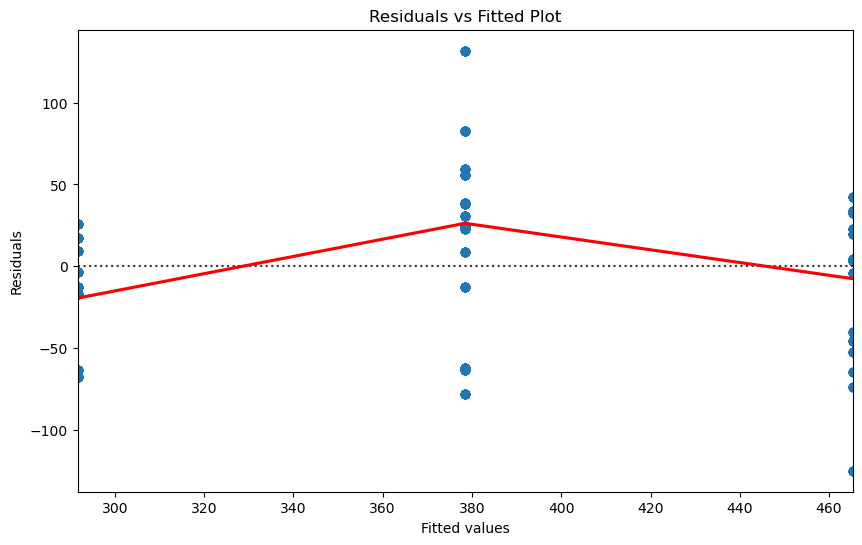

In [6]:
# Transforming data
df['Transformed_Salary'] = np.sqrt(df['Salary'])  # Square root transformation

# Fit linear regression model with transformed data
model = ols('Transformed_Salary ~ Education', data=df).fit()

# Diagnostic plots
plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals vs Fitted Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

In [8]:
# Print regression summary
print("\nLinear Regression results with Transformed Data:")
print(model.summary())


Linear Regression results with Transformed Data:
                              OLS Regression Results                              
Dep. Variable:     Transformed_Test_Score   R-squared:                       0.702
Model:                                OLS   Adj. R-squared:                  0.603
Method:                     Least Squares   F-statistic:                     7.082
Date:                    Tue, 02 Apr 2024   Prob (F-statistic):             0.0263
Time:                            00:20:19   Log-Likelihood:                0.67975
No. Observations:                       9   AIC:                             4.640
Df Residuals:                           6   BIC:                             5.232
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

C:\Users\ARMAND\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
